In [2]:
#Preparation de l'environnement

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('BostonHousingData.csv')
print(df.head(100))

       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0   0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1   0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2   0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3   0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4   0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
..      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
95  0.12204   0.0   2.89   0.0  0.445  6.625  57.8  3.4952    2  276     18.0   
96  0.11504   0.0   2.89   0.0  0.445  6.163  69.6  3.4952    2  276     18.0   
97  0.12083   0.0   2.89   0.0  0.445  8.069  76.0  3.4952    2  276     18.0   
98  0.08187   0.0   2.89   0.0  0.445  7.820  36.9  3.4952    2  276     18.0   
99  0.06860   0.0   2.89   0.0  0.445  7.416  62.5  3.4952    2  276     18.0   

         B  LSTAT  MEDV  
0

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
# Taille du dataset
print("Shape:", df.shape)

Shape: (506, 14)


In [7]:
# Infos sur les colonnes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [8]:
# Valeurs manquantes
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [9]:
# 3. Statistique descriptives
# Statistique de base
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

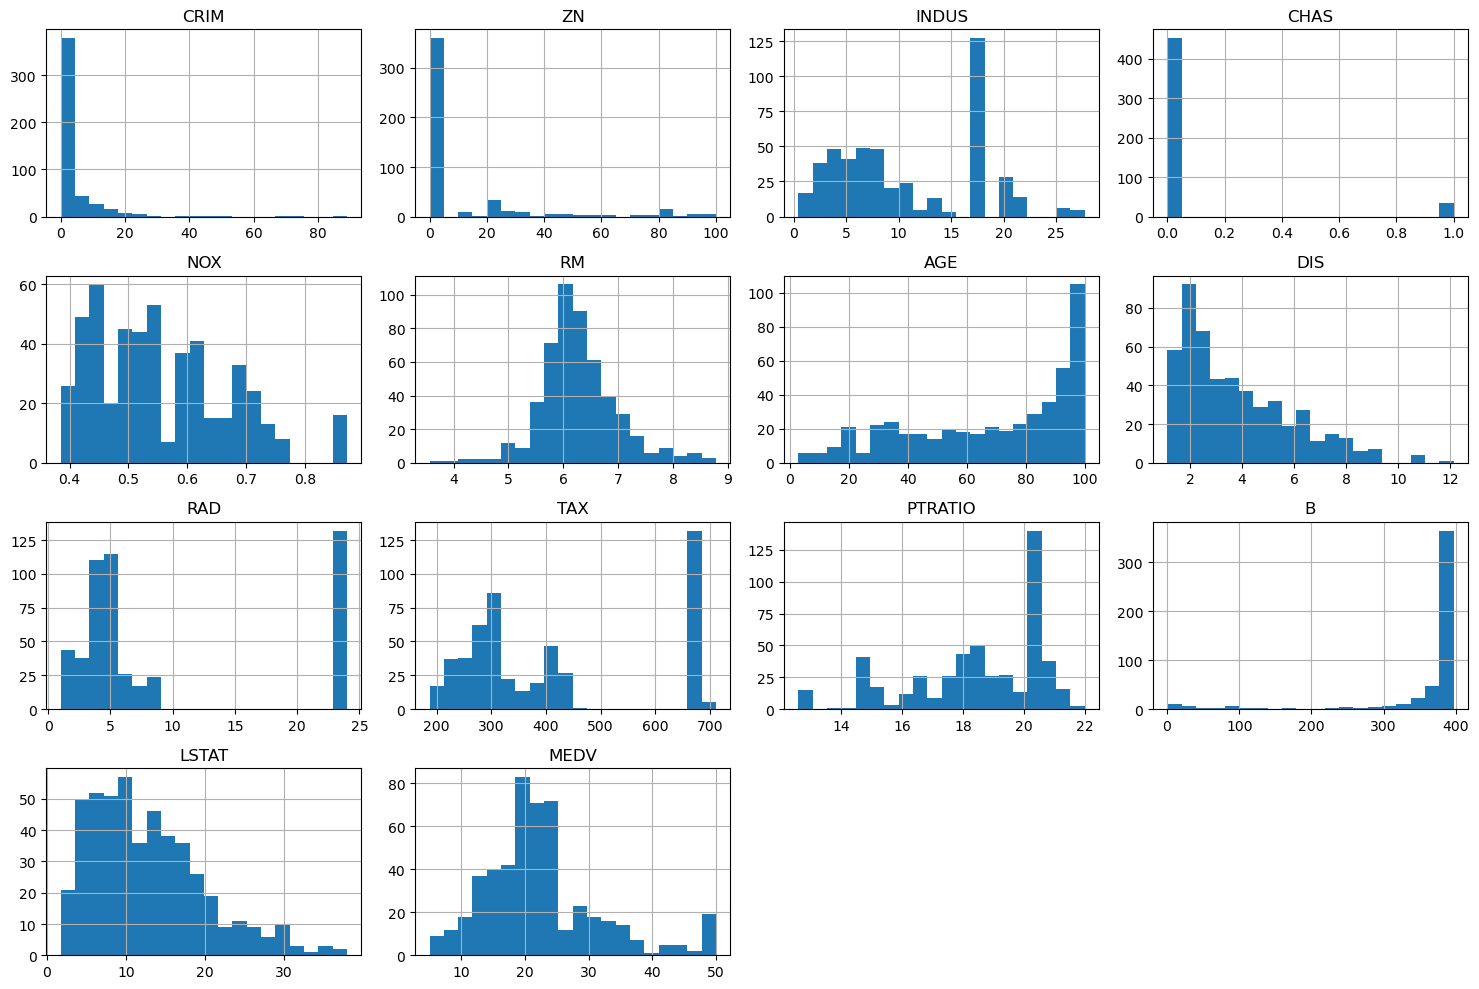

In [10]:
# 4. Visualisation des distributions
# Histogrammes pour toutes les colonnes
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

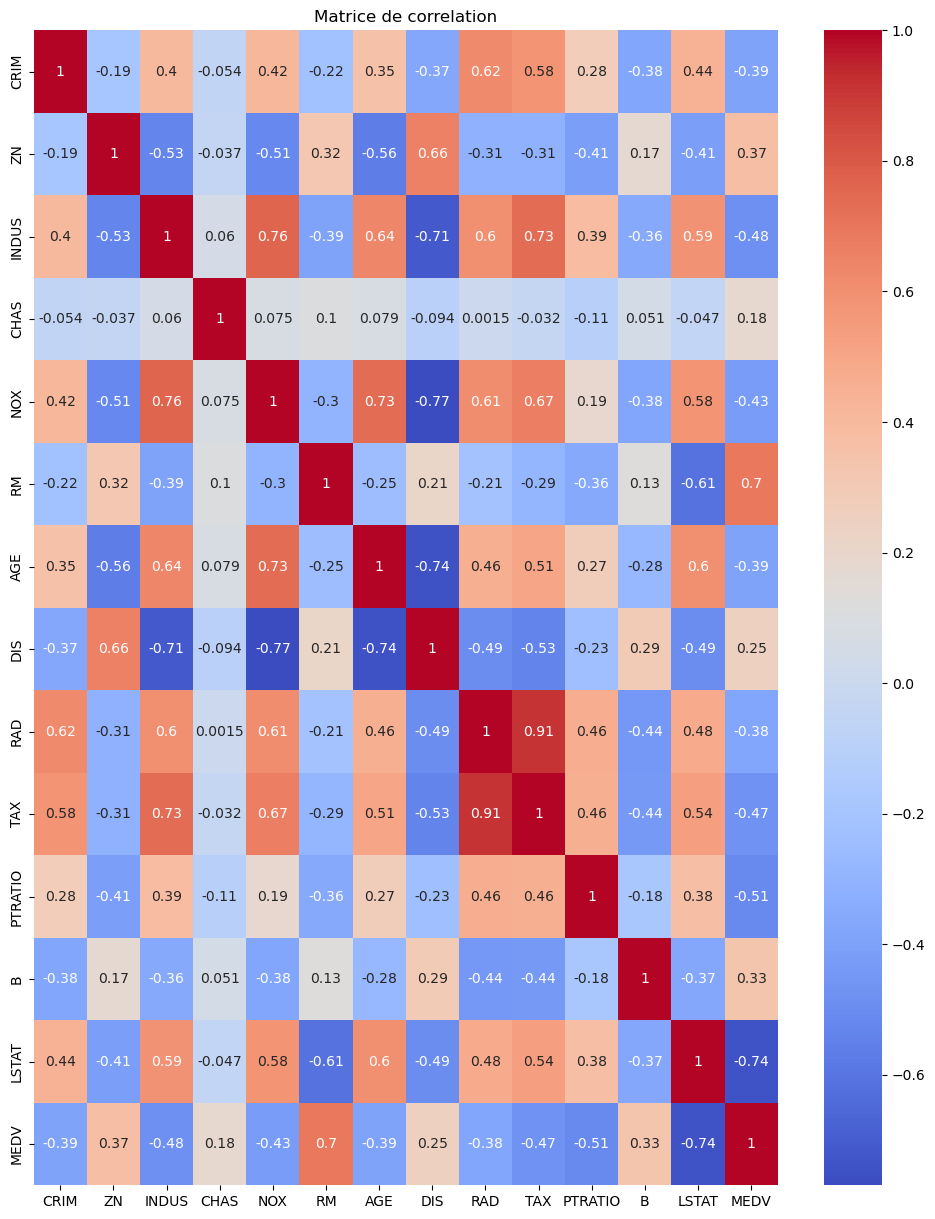

In [11]:
# Matrice de correlation
plt.figure(figsize=(12, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de correlation')
plt.show

In [12]:
"""
RM (nombre de pièces par maison) : corrélation positive de +0.7

➕ Plus il y a de pièces, plus le prix des maisons est élevé.

LSTAT (pourcentage de population pauvre) : corrélation négative de -0.74

➖ Plus il y a de population défavorisée, plus le prix diminue.

PTRATIO (ratio élèves/professeurs) : corrélation négative de -0.51

➖ Un ratio élevé indique une moins bonne qualité d'éducation → prix plus bas.

TAX (taux d’imposition) : corrélation négative de -0.47

➖ Des taxes élevées sont liées à des maisons moins chères.

NOX (pollution de l’air) : corrélation négative de -0.43

➖ Plus de pollution → prix plus bas.
"""

"\nRM (nombre de pièces par maison) : corrélation positive de +0.7\n\n➕ Plus il y a de pièces, plus le prix des maisons est élevé.\n\nLSTAT (pourcentage de population pauvre) : corrélation négative de -0.74\n\n➖ Plus il y a de population défavorisée, plus le prix diminue.\n\nPTRATIO (ratio élèves/professeurs) : corrélation négative de -0.51\n\n➖ Un ratio élevé indique une moins bonne qualité d'éducation → prix plus bas.\n\nTAX (taux d’imposition) : corrélation négative de -0.47\n\n➖ Des taxes élevées sont liées à des maisons moins chères.\n\nNOX (pollution de l’air) : corrélation négative de -0.43\n\n➖ Plus de pollution → prix plus bas.\n"

In [13]:
# Pour traiter les outliers (ex: methode IQR):
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df<(Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Nettoyage: valeurs manquantes
# Suppression des lignes avec valeurs manquantes (si peu nombreuses)
df.dropna(inplace=True)

In [15]:
print("Shape:", df.shape)

Shape: (394, 14)


In [16]:
"""
Nous avons fini avec le nettoyage, nous allons maintenant passer 
a l'etape suivant qui d'estimer la variable MEDV (prix median d'un logement) a partir des autres variables 
 comme CRIM, RM, LSTAT, etc
 """

"\nNous avons fini avec le nettoyage, nous allons maintenant passer \na l'etape suivant qui d'estimer la variable MEDV (prix median d'un logement) a partir des autres variables \n comme CRIM, RM, LSTAT, etc\n "

In [17]:
# 1. Separation des variables
# X contient toutes les colonnes sauf MEDV (cible)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [18]:
# 2. Division en jeu d'entrainement et test
# from sklearn.model_selection import train_test_split: deja importer des le debut
# On garde 20 % des donnees pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# 3. Creation et entrainement du modele
# from sklearn.linear_model import LinearRegression
# Initialisation du modele
model = LinearRegression()
# Entrainement
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# 4. Predictions sur les donnees test
# Predire les valeurs sur les donnees test
y_pred = model.predict(X_test)

In [21]:
# 5. Evaluation des performances
from sklearn.metrics import mean_squared_error, r2_score
# MSE: erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)

# R2: proportion de variance expliquee
r2 = r2_score(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:2f}")
print(f"Coefficient de determination (R2) : {r2:.2f}")

Erreur quadratique moyenne (MSE) : 28.870772
Coefficient de determination (R2) : 0.69


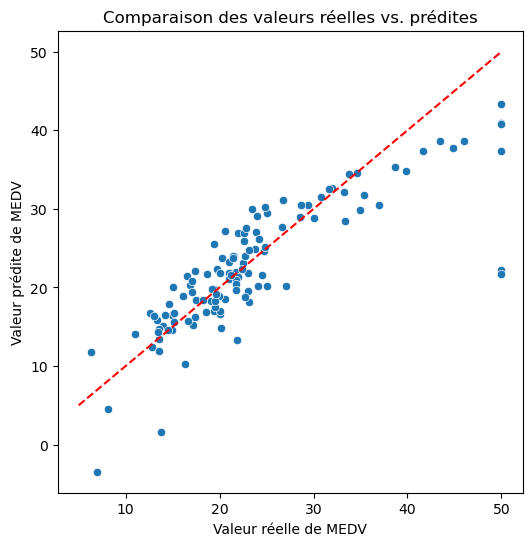

In [22]:
#. 6. Visualisation des predictions
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeur réelle de MEDV")
plt.ylabel("Valeur prédite de MEDV")
plt.title("Comparaison des valeurs réelles vs. prédites")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [23]:
valeur_moyenne = np.mean(y_pred)

In [24]:
print(f"Estimation moyenne du modèle : {valeur_moyenne:.3f} milliers de dollars")

Estimation moyenne du modèle : 22.646 milliers de dollars


In [25]:
"""
Interprétation :
le modèle prédit en moyenne 23.244, cela signifie :
« Selon notre modèle, la valeur typique d’un logement dans cette région est environ 23 244 $. »
"""

'\nInterprétation :\nle modèle prédit en moyenne 23.244, cela signifie :\n« Selon notre modèle, la valeur typique d’un logement dans cette région est environ 23 244 $. »\n'

In [26]:
""" Exemple : prédire pour la première ligne du jeu de test
sample = X_test.iloc[0].values.reshape(1, -1)

prediction = model.predict(sample)
print(f"Valeur estimée pour cette maison : {prediction[0]:.2f} milliers de dollars")

# Pour comparer avec la valeur réelle :
print(f"Valeur réelle : {y_test.iloc[0]:.2f} milliers de dollars")
"""

' Exemple : prédire pour la première ligne du jeu de test\nsample = X_test.iloc[0].values.reshape(1, -1)\n\nprediction = model.predict(sample)\nprint(f"Valeur estimée pour cette maison : {prediction[0]:.2f} milliers de dollars")\n\n# Pour comparer avec la valeur réelle :\nprint(f"Valeur réelle : {y_test.iloc[0]:.2f} milliers de dollars")\n'

In [31]:
# Question 2, Identification des attrbuts peu influents
import pandas as pd

# Créer un DataFrame avec les coefficients
coefs = pd.DataFrame({
    "Attribut": X.columns,
    "Coefficient": model.coef_
})

# Ajouter la valeur absolue pour trier par importance
coefs["AbsCoef"] = coefs["Coefficient"].abs()

# Trier du moins influent au plus influent
coefs_sorted = coefs.sort_values(by="AbsCoef", ascending=True)

# Afficher les attributs avec leurs coefficients
print(coefs_sorted[["Attribut", "Coefficient"]])


   Attribut  Coefficient
11        B     0.009072
9       TAX    -0.016819
6       AGE    -0.019998
1        ZN     0.044959
2     INDUS     0.057545
0      CRIM    -0.112991
8       RAD     0.277672
12    LSTAT    -0.364601
10  PTRATIO    -0.896637
3      CHAS     1.180994
7       DIS    -1.406332
5        RM     4.271383
4       NOX   -17.252217


In [37]:
"""
Interprétation des coefficients
Plus la valeur d’un coefficient est proche de zéro, moins l’attribut a d’influence sur la prédiction de MEDV.

Voici les attributs qui influencent le moins ton modèle :


Attribut	Coefficient	Interprétation
B	+0.009	Influence négligeable 
TAX	-0.017	Influence très faible 
AGE	-0.020	Influence très faible 
ZN	+0.045	Faible influence 
INDUS	+0.058	Faible influence 
Ces variables ont des effets très faibles, tu peux considérer qu’elles n’influencent pas significativement la prédiction dans ton modèle.

Attributs avec grande influence :

Attribut	Coefficient	Effet
NOX (pollution)	-17.25	Très forte influence négative 
RM (nombre de pièces)	+4.27	Influence positive forte 
DIS (distance aux centres d’emploi)	-1.41	Moyenne influence négative 
CHAS (proximité de la rivière)	+1.18	Influence positive significative 

Conclusion
Les attributs qui influencent peu ton modèle sont donc :B, TAX, AGE, ZN, INDUS
"""

'\nInterprétation des coefficients\nPlus la valeur d’un coefficient est proche de zéro, moins l’attribut a d’influence sur la prédiction de MEDV.\n\nVoici les attributs qui influencent le moins ton modèle :\n\n\nAttribut\tCoefficient\tInterprétation\nB\t+0.009\tInfluence négligeable \nTAX\t-0.017\tInfluence très faible \nAGE\t-0.020\tInfluence très faible \nZN\t+0.045\tFaible influence \nINDUS\t+0.058\tFaible influence \nCes variables ont des effets très faibles, tu peux considérer qu’elles n’influencent pas significativement la prédiction dans ton modèle.\n\nAttributs avec grande influence :\n\nAttribut\tCoefficient\tEffet\nNOX (pollution)\t-17.25\tTrès forte influence négative \nRM (nombre de pièces)\t+4.27\tInfluence positive forte \nDIS (distance aux centres d’emploi)\t-1.41\tMoyenne influence négative \nCHAS (proximité de la rivière)\t+1.18\tInfluence positive significative \n\nConclusion\nLes attributs qui influencent peu ton modèle sont donc :B, TAX, AGE, ZN, INDUS\n'

In [38]:
# predict_boston.py
# Charger le modèle
model = joblib.load('modele_boston.pkl')

# Exemple de nouvelle entrée
new_data = pd.DataFrame([{
    'CRIM': 0.1, 'ZN': 0.0, 'INDUS': 8.0, 'CHAS': 0, 'NOX': 0.5,
    'RM': 6.0, 'AGE': 65.0, 'DIS': 4.0, 'RAD': 4, 'TAX': 300,
    'PTRATIO': 18.0, 'B': 390.0, 'LSTAT': 10.0
}])

# Prédire
prediction = model.predict(new_data)
print(f"Valeur prédite : {prediction[0]:.2f} milliers de dollars")


Valeur prédite : 23.34 milliers de dollars
